In [1]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import pandas as pd
from collections import OrderedDict
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Get stats for MS Dhoni

In [4]:
url="http://stats.espncricinfo.com/ci/engine/player/28081.html?class=2;template=results;type=batting;view=innings"
html = urllib.request.urlopen(url, context=ctx).read()

In [37]:
bs=BeautifulSoup(html, "lxml")
mydivs = bs.findAll("div", {"class": "icc-home"})
player_name = mydivs[0].findAll("a")[0].text.split("/")[2]


In [38]:
temp_data=OrderedDict()
list_of_dict=[]
bs=BeautifulSoup(html, "lxml")
table_body=bs.find_all('tbody')
rows = table_body[1].find_all('tr')
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    temp_data=OrderedDict()
    for i in range(len(cols)):
    	temp_data["Runs"]=cols[0]
    	temp_data["Mins"]=cols[1]
    	temp_data["BF"]=cols[2]
    	temp_data["4s"]=cols[3]
    	temp_data["6s"]=cols[4]
    	temp_data["SR"]=cols[5]
    	temp_data["POS"]=cols[6]
    	temp_data["Dismissal"]=cols[7]
    	temp_data["Inns"]=cols[8]
    	temp_data["Opposition"]=cols[10]
    	temp_data["Ground"]	=cols[11]
    	temp_data["Date"]=cols[12]
    list_of_dict.append(temp_data)	

In [39]:
df=pd.DataFrame(list_of_dict)

In [40]:
#Data Analysis


In [41]:
def formatRuns(runs):
    runs = runs.replace("*",'')
    try:
        return int(runs)
    except:
        return 0

In [42]:
df['Runs'] = df['Runs'].apply(lambda runs: formatRuns(runs))

In [43]:
def formatDate(date):
    year = date.split(" ")[-1]
    return year

In [47]:
df['Year'] = df['Date'].apply(lambda date: formatDate(date))

In [48]:
res = df.groupby(['Year']).agg({'Runs': 'sum','Opposition':'count'})

In [49]:
res=res.rename(columns = {'Opposition':'Matches'})

In [58]:
dictio = res.to_dict('index')

In [60]:
dictio

{'2004': {'Runs': 19, 'Matches': 3},
 '2005': {'Runs': 895, 'Matches': 27},
 '2006': {'Runs': 821, 'Matches': 29},
 '2007': {'Runs': 1103, 'Matches': 37},
 '2008': {'Runs': 1097, 'Matches': 29},
 '2009': {'Runs': 1198, 'Matches': 29},
 '2010': {'Runs': 600, 'Matches': 18},
 '2011': {'Runs': 764, 'Matches': 24},
 '2012': {'Runs': 524, 'Matches': 16},
 '2013': {'Runs': 753, 'Matches': 26},
 '2014': {'Runs': 418, 'Matches': 12},
 '2015': {'Runs': 640, 'Matches': 20},
 '2016': {'Runs': 278, 'Matches': 13},
 '2017': {'Runs': 788, 'Matches': 29},
 '2018': {'Runs': 275, 'Matches': 20},
 '2019': {'Runs': 600, 'Matches': 18}}

In [32]:
res.reset_index(level=0, inplace=True)
res

,Year,Runs,Matches
0,2004,19,3
1,2005,895,27
2,2006,821,29
3,2007,1103,37
4,2008,1097,29
5,2009,1198,29
6,2010,600,18
7,2011,764,24
8,2012,524,16
9,2013,753,26


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

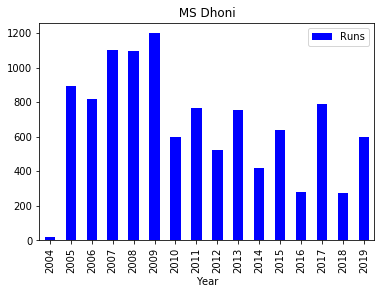

In [50]:
# import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
# from matplotlib.figure import Figure

plt = matplotlib.pyplot

plt.figure(figsize=(20,20))
plt.figure().suptitle('test title', fontsize=20)
res.plot(kind='bar',x="Year",y='Runs',color='Blue',title=player_name)
plt.savefig("file.jpg",dpi=200)
plt.show